# Natural Language Processing with Disaster Tweets
### Kaggle Competition - Mini Project
**Course Assignment**

## Introduction
This project involves classifying disaster-related tweets into real disasters and non-disasters. The dataset contains tweets with corresponding labels indicating whether they are real (1) or not (0).

## Problem Statement
The goal is to build a Natural Language Processing (NLP) model that classifies tweets as either related to disasters or not. This is a binary classification problem.

**Dataset Details:**
- **Train Set:** Labeled tweets with disaster information.
- **Test Set:** Unlabeled tweets to predict outcomes.

**Libraries Used:** `pandas`, `numpy`, `matplotlib`, `seaborn`, `tensorflow`, `sklearn`, `nltk`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score, classification_report
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

## Load and Inspect Data

In [3]:
train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Exploratory Data Analysis (EDA)

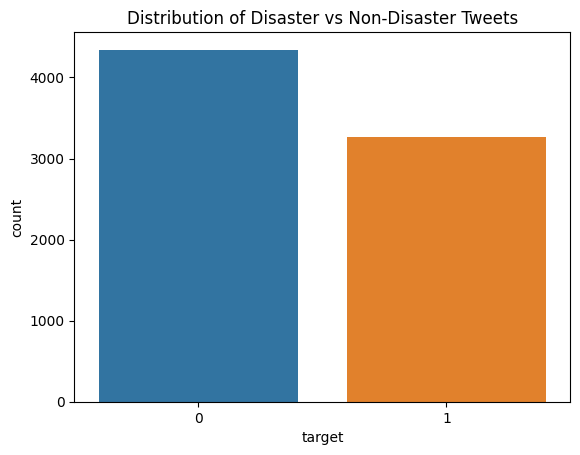

In [4]:
# Check class distribution
sns.countplot(x=train_df['target'])
plt.title('Distribution of Disaster vs Non-Disaster Tweets')
plt.show()

## Data Preprocessing
We will clean the text by removing special characters, URLs, stopwords, and converting text to lowercase.

In [5]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

## Model Architecture
We will use a bidirectional LSTM model with embedding layers to process the text data.

In [6]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(train_df['cleaned_text'])
padded_sequences = pad_sequences(sequences, maxlen=50)

test_sequences = tokenizer.texts_to_sequences(test_df['cleaned_text'])
padded_test_sequences = pad_sequences(test_sequences, maxlen=50)

In [7]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [8]:
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, train_df['target'], test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32, verbose=1)

Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6085 - loss: 0.6459 - val_accuracy: 0.7938 - val_loss: 0.4508
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8492 - loss: 0.3622 - val_accuracy: 0.7991 - val_loss: 0.4593
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.8920 - loss: 0.2917 - val_accuracy: 0.7820 - val_loss: 0.4883
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9104 - loss: 0.2338 - val_accuracy: 0.7708 - val_loss: 0.5526
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9319 - loss: 0.1884 - val_accuracy: 0.7669 - val_loss: 0.6234


## Model Evaluation

In [9]:
y_pred = model.predict(X_val) > 0.5
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')
print(classification_report(y_val, y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Validation Accuracy: 0.7669
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       874
           1       0.73      0.73      0.73       649

    accuracy                           0.77      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



## Kaggle Submission

In [10]:
predictions = model.predict(padded_test_sequences) > 0.5
submission = pd.DataFrame({'id': test_df['id'], 'target': predictions.astype(int).flatten()})
submission.to_csv('submission.csv', index=False)
print('Submission file generated: submission.csv')

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Submission file generated: submission.csv


## Deliverables
- **Jupyter Notebook:** Contains full analysis, model, results, and conclusion.
- **GitHub Repository:** Link to the repository containing the code.
- **Kaggle Leaderboard Screenshot:** Screenshot showing model performance.

**GitHub Repository:**
Please find my project repository at the following link: **https://github.com/meenubura/Week4_NLP_Disaster_Tweets**

**Kaggle Leaderboard:**
The Kaggle leaderboard screenshot will be uploaded after final model evaluation.

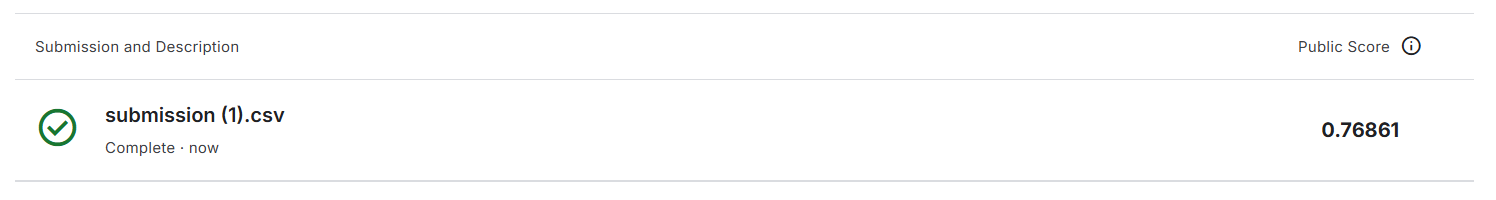